# importing libraries

In [1]:
import numpy as np
import pandas as pd

# Loading dataset

In [2]:
df=pd.read_csv('D:/Research Work/road/attacks/fuzzing_attack_3.log')
df.head()

,(1020000000.000000) can0 0D0#3A4E04644102B200
0,(1020000000.001013) can0 033#123F19256DC127D0
1,(1020000000.001014) can0 00E#2054160208097380
2,(1020000000.002047) can0 193#00080803E8080000
3,(1020000000.002048) can0 107#0000000000000000
4,(1020000000.002049) can0 FFF#0000000000000000


# Spliting the data in different columns

In [3]:
log_data  = open('D:/Research Work/road/attacks/fuzzing_attack_3.log', 'r')
split_list = []

for line in log_data:
    thing1 = line.split(' ')
    time = thing1[0][1:18]
    idd = thing1[1][:4]
    message = thing1[2]
    

    split_list.append([time, idd, message])

df1 = pd.DataFrame(split_list, columns=['Unix Timestamp', 'Channel', 'IDHexandDataFeild'])
#df1['Message'].map(str.strip)
df1

,Unix Timestamp,Channel,IDHexandDataFeild
0,1020000000.000000,can0,0D0#3A4E04644102B200\n
1,1020000000.001013,can0,033#123F19256DC127D0\n
2,1020000000.001014,can0,00E#2054160208097380\n
3,1020000000.002047,can0,193#00080803E8080000\n
4,1020000000.002048,can0,107#0000000000000000\n
...,...,...,...
13233,1020000005.479809,can0,00E#20541602080973C4\n
13234,1020000005.480804,can0,193#00080803E8080000\n
13235,1020000005.481829,can0,107#0000000000000000\n
13236,1020000005.481830,can0,FFF#0000000000000000\n


# Seprating id and dataframe

In [4]:
out = pd.DataFrame(df1.IDHexandDataFeild.str.split('#',1).tolist(),columns=['IDhex','DataFrame'])
out.head()

,IDhex,DataFrame
0,0D0,3A4E04644102B200\n
1,033,123F19256DC127D0\n
2,00E,2054160208097380\n
3,193,00080803E8080000\n
4,107,0000000000000000\n


# choosing these two columns from the original dataset

In [5]:
df2=df1[['Unix Timestamp', 'Channel']] 
df2.head()

,Unix Timestamp,Channel
0,1020000000.000000,can0
1,1020000000.001013,can0
2,1020000000.001014,can0
3,1020000000.002047,can0
4,1020000000.002048,can0


# Converting the data of IDhex column which is in hexadecimal to decimal 

In [6]:
out['IDhex'] = out['IDhex'].apply(lambda x: int(x,16))
out

,IDhex,DataFrame
0,208,3A4E04644102B200\n
1,51,123F19256DC127D0\n
2,14,2054160208097380\n
3,403,00080803E8080000\n
4,263,0000000000000000\n
...,...,...
13233,14,20541602080973C4\n
13234,403,00080803E8080000\n
13235,263,0000000000000000\n
13236,4095,0000000000000000\n


# here converting the DataFrame column's hex data in decimal

In [7]:
out['DataFrame'].str.strip('\n')
out['DataFrame'] = out['DataFrame'].apply(lambda x: int(x,16))
out

,IDhex,DataFrame
0,208,4201300331017187840
1,51,1314797264761333712
2,14,2329511105237971840
3,403,2260612684447744
4,263,0
...,...,...
13233,14,2329511105237971908
13234,403,2260612684447744
13235,263,0
13236,4095,0


In [8]:
#checking the out data which i have converted in decimal which was in hexadecimal
out.head()

,IDhex,DataFrame
0,208,4201300331017187840
1,51,1314797264761333712
2,14,2329511105237971840
3,403,2260612684447744
4,263,0


In [9]:
#now here i'm collecting the two data which i have above splitted from the original data.
#df2 ==here i have collected the data which i don't need to convert in decimaml 
#in out data i have collected the data which i have to convert into decimal.
frames=[df2,out]

In [10]:
# here i concate the two datas, because it need to be togather
result=pd.concat(frames ,axis=1)
result.head()

,Unix Timestamp,Channel,IDhex,DataFrame
0,1020000000.000000,can0,208,4201300331017187840
1,1020000000.001013,can0,51,1314797264761333712
2,1020000000.001014,can0,14,2329511105237971840
3,1020000000.002047,can0,403,2260612684447744
4,1020000000.002048,can0,263,0


In [11]:
#here i have save my data which i have splitted and  converted in decimal 
save=result.to_csv("D:/Research Work/road/extractedfrompython/fuzzing_attack3.csv")

In [12]:
result

,Unix Timestamp,Channel,IDhex,DataFrame
0,1020000000.000000,can0,208,4201300331017187840
1,1020000000.001013,can0,51,1314797264761333712
2,1020000000.001014,can0,14,2329511105237971840
3,1020000000.002047,can0,403,2260612684447744
4,1020000000.002048,can0,263,0
...,...,...,...,...
13233,1020000005.479809,can0,14,2329511105237971908
13234,1020000005.480804,can0,403,2260612684447744
13235,1020000005.481829,can0,263,0
13236,1020000005.481830,can0,4095,0


In [13]:
#checking is there any null values in dataframe column
result['DataFrame'].isnull().sum()
#Unix Timestamp	Channel	IDhex	DataFrame

0

In [14]:
#checking the shape of data ,we have 2991272 rows and 4 columns
result.shape

(13238, 4)

In [15]:
#here we have acknowledge that 
result.size

52952

# Checking unique values

In [16]:
print(result['Unix Timestamp'].unique())
print(result['Unix Timestamp'].nunique())

['1020000000.000000' '1020000000.001013' '1020000000.001014' ...
 '1020000005.481829' '1020000005.481830' '1020000005.482837']
13096


In [17]:
result['Channel'].unique()

array(['can0'], dtype=object)

In [18]:
result = result.loc[:, ~result.columns.str.contains('^Channel')]

result

,Unix Timestamp,IDhex,DataFrame
0,1020000000.000000,208,4201300331017187840
1,1020000000.001013,51,1314797264761333712
2,1020000000.001014,14,2329511105237971840
3,1020000000.002047,403,2260612684447744
4,1020000000.002048,263,0
...,...,...,...
13233,1020000005.479809,14,2329511105237971908
13234,1020000005.480804,403,2260612684447744
13235,1020000005.481829,263,0
13236,1020000005.481830,4095,0


In [19]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
#n =17500  #chunk row size
#list_df = [result[i:i+n]
#for i in range(0,result.shape[0],n)]

Here data is not large that's why i didn't divide into chunks just simply implement algorithm

In [21]:

result.shape

(13238, 3)

In [22]:
X = result.iloc[:, :3].values
X

array([['1020000000.000000', 208, 4201300331017187840],
       ['1020000000.001013', 51, 1314797264761333712],
       ['1020000000.001014', 14, 2329511105237971840],
       ...,
       ['1020000005.481829', 263, 0],
       ['1020000005.481830', 4095, 0],
       ['1020000005.482837', 1455, 2359886204744239104]], dtype=object)

In [23]:
y = result.iloc[:, 2].values
y

array([4201300331017187840, 1314797264761333712, 2329511105237971840, ...,
                         0,                   0, 2359886204744239104],
      dtype=uint64)

In [24]:
print(X)
print(y)

[['1020000000.000000' 208 4201300331017187840]
 ['1020000000.001013' 51 1314797264761333712]
 ['1020000000.001014' 14 2329511105237971840]
 ...
 ['1020000005.481829' 263 0]
 ['1020000005.481830' 4095 0]
 ['1020000005.482837' 1455 2359886204744239104]]
[4201300331017187840 1314797264761333712 2329511105237971840 ...
                   0                   0 2359886204744239104]


In [25]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# RANDOM FOREST

In [26]:
from sklearn import metrics
model= RandomForestClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('Accuracy From Random Forest: ', accuracy_score(y_test, prediction))


Accuracy From Random Forest:  0.4949647532729104


# KNN

In [27]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

prediction=knn1.predict(X_test)

print('Accuracy From KNN: ', accuracy_score(y_test, prediction))



Accuracy From KNN:  0.6865558912386707


In [28]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
prediction=DT.predict(X_test)
print('Accuracy DEcision Tree: ', accuracy_score(y_test, prediction))  




Accuracy DEcision Tree:  0.49370594159113795


# SVM

In [ ]:
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score





In [36]:
svm_m=SVC()
svm_m.fit(X_train,y_train)
prediction=svm_m.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, prediction), '\n')



Accuracy:  0.2094662638469285 



In [29]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

All Accuracies:  [0.6858006  0.6978852  0.70694864 0.71601208 0.6978852  0.68882175
 0.6978852  0.70543807 0.70543807 0.70090634 0.69939577 0.69486405
 0.69939577 0.68882175 0.68126888 0.69335347 0.6978852  0.69637462
 0.69591528 0.68683812] 

Mean of all Accuracies:  0.6968567034293002 

Standard Deviation:  0.007942456144810626


Text(0, 0.5, 'Accuracies')

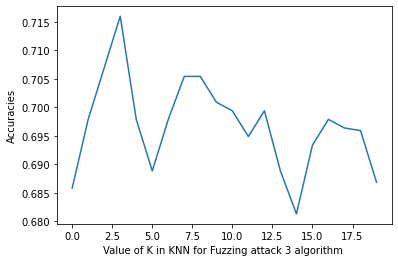

In [30]:
knn = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(knn, X, y, cv=20, scoring='accuracy')
print('All Accuracies: ', scores, '\n')

print('Mean of all Accuracies: ', scores.mean(), '\n')
print('Standard Deviation: ', scores.std())

plt.plot(scores)
plt.xlabel('Value of K in KNN for Fuzzing attack 3 algorithm ')
plt.ylabel('Accuracies')


# By keeping neighbour value 10

All Accuracies:  [0.57703927 0.58006042 0.58308157 0.59516616 0.58912387 0.59214502
 0.60271903 0.61480363 0.6102719  0.60271903 0.59667674 0.59214502
 0.58761329 0.58761329 0.58006042 0.5755287  0.58459215 0.59063444
 0.57639939 0.57337368] 

Mean of all Accuracies:  0.5895883514404157 

Standard Deviation:  0.011297945511568923


Text(0, 0.5, ' Accuracies')

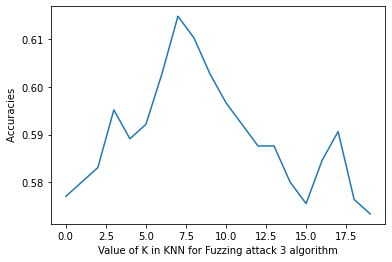

In [32]:
knn = KNeighborsClassifier(n_neighbors=10)

scores = cross_val_score(knn, X, y, cv=20, scoring='accuracy')
print('All Accuracies: ', scores, '\n')

print('Mean of all Accuracies: ', scores.mean(), '\n')
print('Standard Deviation: ', scores.std())

plt.plot(scores)
plt.xlabel('Value of K in KNN for Fuzzing attack 3 algorithm')
plt.ylabel(' Accuracies')


# DECISION TREE

All Accuracies:  [0.5387931  0.53232759 0.54741379 0.5387931  0.53448276 0.52801724
 0.52699784 0.56155508 0.55507559 0.50323974 0.51403888 0.49676026
 0.50539957 0.51403888 0.48812095 0.50539957 0.52483801 0.5075594
 0.5075594  0.50971922] 

Mean of all Accuracies:  0.5220064981008417 

Standard Deviation:  0.019471470080192597


Text(0, 0.5, 'Cross-Validated Accuracy')

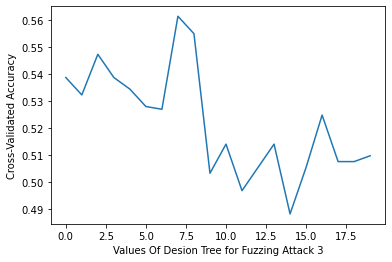

In [33]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

classifier = DecisionTreeClassifier(criterion ="entropy", splitter ="random", max_depth =5,  min_samples_split =5,
                              min_samples_leaf =2, max_features =2)

all_accuracies = cross_val_score(estimator=DT, X=X_train, y=y_train, cv=20)

print('All Accuracies: ', all_accuracies, '\n')

print('Mean of all Accuracies: ', all_accuracies.mean(), '\n')
print('Standard Deviation: ', all_accuracies.std())

plt.plot(all_accuracies)
plt.xlabel('Values Of Desion Tree for Fuzzing Attack 3')
plt.ylabel('Cross-Validated Accuracy')


# Decision Tree

All Accuracies:  [0.5387931  0.53448276 0.54525862 0.54310345 0.53232759 0.5237069
 0.52915767 0.56155508 0.55291577 0.50323974 0.51403888 0.49676026
 0.50539957 0.50971922 0.48596112 0.50539957 0.51835853 0.50971922
 0.5075594  0.51187905] 

Mean of all Accuracies:  0.5214667740373873 

Standard Deviation:  0.019529252377356515


Text(0, 0.5, 'Cross-Validated Accuracy')

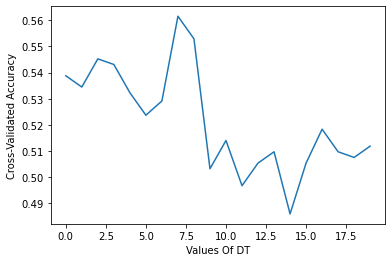

In [34]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

classifier = DecisionTreeClassifier(criterion ="entropy", splitter ="random", max_depth =70,  min_samples_split =6,
                              min_samples_leaf =3, max_features =3)

all_accuracies = cross_val_score(estimator=DT, X=X_train, y=y_train, cv=20)

print('All Accuracies: ', all_accuracies, '\n')

print('Mean of all Accuracies: ', all_accuracies.mean(), '\n')
print('Standard Deviation: ', all_accuracies.std())

plt.plot(all_accuracies)
plt.xlabel('Values Of DT')
plt.ylabel('Cross-Validated Accuracy')


# Random Forest:

All Accuracies:  [0.42071197 0.38942826 0.40560949 0.43473571 0.41423948 0.39590076
 0.39308855 0.42332613 0.40172786 0.41036717] 

Mean of all Accuracies:  0.40891353934403696
Standard Deviation:  0.013806441960116435


Text(0, 0.5, 'Cross- Validated Accuracy')

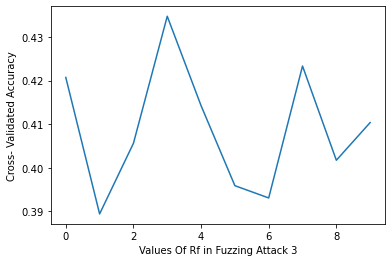

In [37]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

classifier = RandomForestClassifier(n_estimators=2, random_state=0)

all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

print('All Accuracies: ', all_accuracies, '\n')

print('Mean of all Accuracies: ', all_accuracies.mean())
print('Standard Deviation: ', all_accuracies.std())

plt.plot(all_accuracies)
plt.xlabel('Values Of Rf in Fuzzing Attack 3')
plt.ylabel('Cross- Validated Accuracy')
